In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from statsmodels.distributions.empirical_distribution import ECDF

In [4]:
df_prescript  = pd.read_csv('/work/amr-uti/data/all_prescriptions.csv')
df_uti_features = pd.read_csv('/work/amr-uti/data/all_uti_features.csv')
df_uti_resist_lab = pd.read_csv('/work/amr-uti/data/all_uti_resist_labels.csv')
data_dict = pd.read_csv('/work/amr-uti/data/data_dictionary.csv')
test_uncomp_resist_data =  pd.read_csv('/work/amr-uti/data//test_uncomp_resist_data.csv')
test_uncomp_uti_features =  pd.read_csv('/work/amr-uti/data//test_uncomp_uti_features.csv')
train_uncomp_resist_data =  pd.read_csv('/work/amr-uti/data//train_uncomp_resist_data.csv')
train_uncomp_uti_features =  pd.read_csv('/work/amr-uti/data//train_uncomp_uti_features.csv')


In [5]:
all_uncomp_uti_features = test_uncomp_uti_features.append(train_uncomp_uti_features)
all_uncomp_uti_features.shape[0]
print('The size of the uncomp train set', test_uncomp_resist_data.shape[0])
print('The size of the uncomp train set', train_uncomp_resist_data.shape[0])


The size of the uncomp train set 3941
The size of the uncomp train set 11865


In [6]:

# Find Feature Lists

starting = 'infection_site'
df_prescript.head()
features = [s for s in list(df_uti_features.isna().sum().index) if s.startswith(starting)]
print('\n'.join(features))
print('Number of Features:', len(features))

infection_sites - RESPIRATORY_TRACT
infection_sites - BLOOD
infection_sites - SKIN_SOFTTISSUE
infection_sites - ABSCESS_OR_FLUID_NOS
infection_sites - MUCOCUTANEOUS
infection_sites - GENITOURINARY
Number of Features: 6


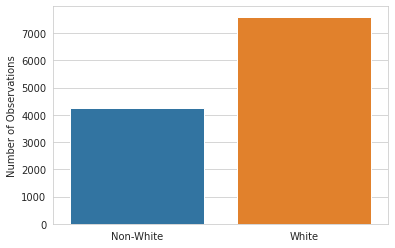

In [7]:
# Training set demographic distribution
count = train_uncomp_uti_features["demographics - is_white"].value_counts()
sns.set_style('whitegrid')
g = sns.barplot(x = count.index, y = count)
g.set(ylabel='Number of Observations')
_ = g.set(xticklabels=['Non-White', 'White'])

<AxesSubplot:xlabel='demographics - is_white', ylabel='demographics - age'>

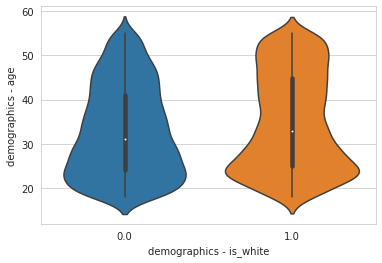

In [8]:
sns.violinplot(x = 'demographics - is_white', y = 'demographics - age', data = train_uncomp_uti_features)


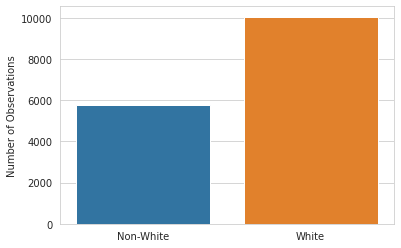

In [9]:
# Total set demographic distribution
count = all_uncomp_uti_features["demographics - is_white"].value_counts()
sns.set_style('whitegrid')
g = sns.barplot(x = count.index, y = count)
g.set(ylabel='Number of Observations')
_ = g.set(xticklabels=['Non-White', 'White'])

<AxesSubplot:xlabel='demographics - is_white', ylabel='demographics - age'>

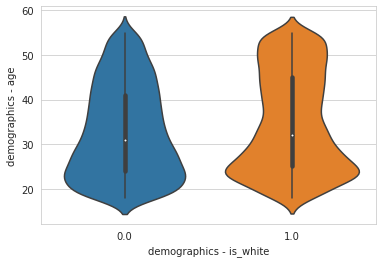

In [10]:
sns.violinplot(x = 'demographics - is_white', y = 'demographics - age', data = all_uncomp_uti_features)


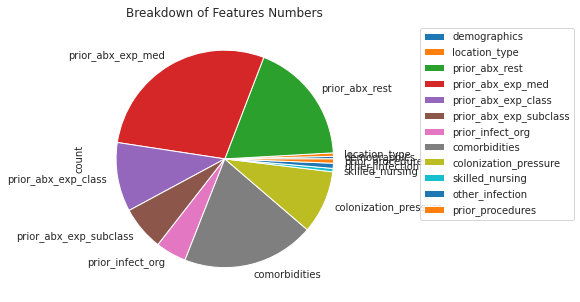

In [11]:
pie = pd.DataFrame({'count': [3, 4 , 144, 224, 81, 52, 36, 155, 74, 4, 6, 5]},
                  index=['demographics', 'location_type', 'prior_abx_rest','prior_abx_exp_med', 'prior_abx_exp_class','prior_abx_exp_subclass', 'prior_infect_org', 'comorbidities','colonization_pressure', 'skilled_nursing', 'other_infection', 'prior_procedures' ])
plot = pie.plot.pie(y='count', figsize=(5, 5))
plot.set_title("Breakdown of Features Numbers")
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left')

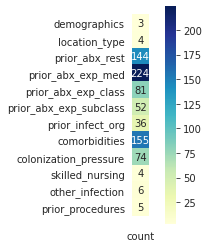

In [12]:
_  =  sns.heatmap(pie, annot=True, fmt="d",  cmap="YlGnBu", square = True)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [13]:
df_uti_resist_lab.head()

,example_id,NIT,SXT,CIP,LVX,is_train,uncomplicated
0,0,0.0,0.0,0.0,0.0,0,0
1,1,0.0,0.0,0.0,0.0,1,0
2,2,0.0,0.0,1.0,1.0,1,0
3,3,0.0,0.0,0.0,0.0,1,0
4,4,0.0,0.0,0.0,0.0,1,1


In [14]:
# Study only looked at uncomplicated UTI

df_uti_resist_lab.groupby(['is_train', 'uncomplicated']).size()

is_train  uncomplicated
0         0                31999
          1                 3941
1         0                69097
          1                11865
dtype: int64

In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data_dict

,file,column,until,from,description
0,all_uti_resist_labels.csv,example_id,NaN,NaN,Unique specimen ID used to link between files
1,all_uti_resist_labels.csv,NIT,NaN,NaN,Indicator of resistance to nitrofurantoin
2,all_uti_resist_labels.csv,SXT,NaN,NaN,Indicator of resistance to trimethoprim-sulfam...
3,all_uti_resist_labels.csv,CIP,NaN,NaN,Indicator of resistance to ciprofloxacin
4,all_uti_resist_labels.csv,LVX,NaN,NaN,Indicator of resistance to levofloxacin
5,all_uti_resist_labels.csv,is_train,NaN,NaN,Used to denote membership in training set (200...
6,all_uti_resist_labels.csv,uncomplicated,NaN,NaN,Used to denote membership in uncomplicated UTI...
7,all_prescriptions.csv,example_id,NaN,NaN,Unique specimen ID used to link between files
8,all_prescriptions.csv,prescription,NaN,NaN,"Observed empiric prescription (one of NIT, SXT..."
9,all_prescriptions.csv,is_train,NaN,NaN,Used to denote membership in training set (200...


In [18]:
all_proba = pd.read_csv("/work/amr-uti-stm/experiments/experiment_results/test_predictions.csv")
test_proba = all_proba.query("is_train == 0")
train_proba = all_proba.query("is_train == 1")
print("Test set size", test_proba.shape)
print("Training set size", train_proba.shape)

is_white = (all_uncomp_uti_features['demographics - is_white'] == 1)
is_nonwhite = (all_uncomp_uti_features['demographics - is_white'] == 0)

is_white_tr = (train_uncomp_uti_features['demographics - is_white'] == 1)
is_nonwhite_tr = (train_uncomp_uti_features['demographics - is_white'] == 0)
print('Training', 'White:', sum(is_white_tr),'Non-white:', sum(is_nonwhite_tr))
is_white_te = (test_uncomp_uti_features['demographics - is_white'] == 1)
is_nonwhite_te = (test_uncomp_uti_features['demographics - is_white'] == 0)
print('Test', 'White:', sum(is_white_te),'Non-white:', sum(is_nonwhite_te))


white_proba = all_proba[is_white.reset_index()['demographics - is_white']] 
nonwhite_proba = all_proba[is_nonwhite.reset_index()['demographics - is_white']] 


print(white_proba.shape)
print(nonwhite_proba.shape)
# %%
white_proba.head()

Test set size (3941, 6)
Training set size (11865, 6)
Training White: 7599 Non-white: 4266
Test White: 2455 Non-white: 1486
(10054, 6)
(5752, 6)


,example_id,is_train,predicted_prob_NIT,predicted_prob_SXT,predicted_prob_CIP,predicted_prob_LVX
0,4,1,0.104761,0.152455,0.040829,0.035046
5,68,1,0.138636,0.147924,0.042233,0.042460
11,129,1,0.099924,0.212818,0.039902,0.034858
12,132,1,0.209293,0.116104,0.043798,0.037859
16,177,1,0.098230,0.151711,0.034956,0.035468


In [58]:
white_proba.to_csv('white_proba.csv')
nonwhite_proba.to_csv('non_whiteproba.csv')

In [20]:
white_proba.columns

Index(['example_id', 'is_train', 'predicted_prob_NIT', 'predicted_prob_SXT',
       'predicted_prob_CIP', 'predicted_prob_LVX'],
      dtype='object')

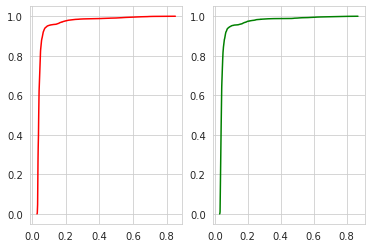

In [47]:
ecdf_white = ECDF(white_proba['predicted_prob_CIP'])
ecdf_nonwhite = ECDF(nonwhite_proba['predicted_prob_CIP'])fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(ecdf_white.x, ecdf_white.y, color='r')
ax2.plot(ecdf_nonwhite.x, ecdf_nonwhite.y, color='g')


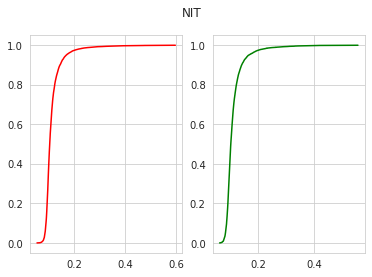

In [52]:
ecdf_white = ECDF(white_proba['predicted_prob_NIT'])
ecdf_nonwhite = ECDF(nonwhite_proba['predicted_prob_NIT'])
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.suptitle('NIT')
ax1.plot(ecdf_white.x, ecdf_white.y, color='r')
ax2.plot(ecdf_nonwhite.x, ecdf_nonwhite.y, color='g')


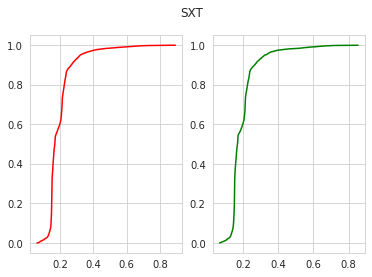

In [55]:
ecdf_white = ECDF(white_proba['predicted_prob_SXT'])
ecdf_nonwhite = ECDF(nonwhite_proba['predicted_prob_SXT'])
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.suptitle('SXT')
ax1.plot(ecdf_white.x, ecdf_white.y, color='r')
ax2.plot(ecdf_nonwhite.x, ecdf_nonwhite.y, color='g')


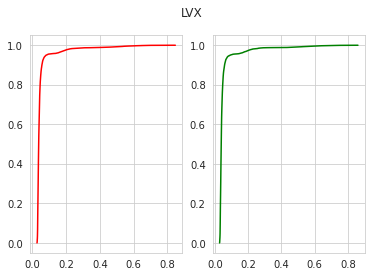

In [59]:
ecdf_white = ECDF(white_proba['predicted_prob_LVX'])
ecdf_nonwhite = ECDF(nonwhite_proba['predicted_prob_LVX'])
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.suptitle('LVX')
ax1.plot(ecdf_white.x, ecdf_white.y, color='r')
ax2.plot(ecdf_nonwhite.x, ecdf_nonwhite.y, color='g')
